In [2]:
%matplotlib notebook
%load_ext autoreload
%autoreload 1
!hostname
!pwd

dv001.ib.bridges2.psc.edu
/ocean/projects/asc170022p/mtragoza/mre-pinn/IPMI-2023


In [3]:
import sys, os
import numpy as np

sys.path.append('..')
%aimport mre_pinn

sys.path.append('../../param_search')
%aimport param_search
ps = param_search

Using backend: pytorch



# IPMI 2023 phantom experiment

In [4]:
%pwd

'/ocean/projects/asc170022p/mtragoza/mre-pinn/IPMI-2023'

In [9]:
# define the job template and name format

template = '''\
#!/bin/bash
#SBATCH --job-name={job_name}
#SBATCH --account=asc170022p
#SBATCH --partition=GPU-shared
#SBATCH --gres=gpu:1
#SBATCH --time=48:00:00
#SBATCH -o %J.stdout
#SBATCH -e %J.stderr
#SBATCH --mail-type=all

hostname
pwd
source activate MRE-PINN

python ../../../train.py \\
    --xarray_dir {xarray_dir} \\
    --example_id {example_id} \\
    --frequency {frequency} \\
    --omega {omega} \\
    --polar_input {polar_input} \\
    --pde_name {pde_name} \\
    --pde_warmup_iters 10000 \\
    --pde_step_iters 5000 \\
    --pde_step_factor 10 \\
    --pde_init_weight {pde_init_weight} \\
    --pde_loss_weight {pde_loss_weight} \\
    --save_prefix {job_name}    
'''
name = 'train_{data_name}_{example_id}_{pde_name}'

# define the parameter space

fem_box_space = ps.ParamSpace(
    data_name='fem_box',
    xarray_dir='../../../data/BIOQIC/fem_box',
    example_id=[50, 60, 70, 80, 90, 100],
    frequency='auto',
    omega=30,
    pde_name=['helmholtz', 'hetero'],
    pde_init_weight=1e-10,
    pde_loss_weight=1e-8,
    polar_input=0,
)
phantom_space = ps.ParamSpace(
    data_name='phantom',
    xarray_dir='../../../data/BIOQIC/phantom',
    example_id=[30, 40, 50, 60, 70, 80, 90, 100],
    frequency='auto',
    omega=30,
    pde_name=['helmholtz', 'hetero'],
    pde_init_weight=1e-12,
    pde_loss_weight=1e-10,
    polar_input=0,
)
patient_space = ps.ParamSpace(
    data_name='patient',
    xarray_dir='../../../data/NAFLD/v3',
    example_id=['0006', '0020', '0024', '0029', '0043', '0047', '0126', '0135', '0155', '0164', '0172', '0173', '0210', '0213', '0219', '0222', '0234', '0235', '0291', '0344', '0378', '0384', '0395', '0401', '0415', '0457', '0461', '0491', '0492', '0496', '0509', '0510', '0516', '0525', '0564', '0604', '0612', '0615', '0628', '0639', '0648', '0650', '0653', '0655', '0659', '0693', '0704', '0717', '0727', '0734', '0737', '0740', '0747', '0748', '0898', '0900', '0929', '0931', '0932', '0940', '0954', '0964', '0965', '0979', '0989', '0995', '1028', '1033', '1039', '1045', '1075', '1076', '1077', '1083', '1103', '1106', '1108', '1110', '1119', '1121', '1123', '1134', '1144', '1149', '1205', '1207', '1215', '1217', '1230', '1261', '1271', '1296', '1303', '1311', '1329', '1337', '1341', '1343', '1344', '1382', '1395', '1400', '1404', '1417', '1426', '1427', '1433', '1435', '1448', '1453', '1456', '1464', '1671', '1679', '1694', '1699', '1706', '1712', '1714', '1715', '1720', '1722', '1727', '1736', '1748', '1785', '1786', '1790', '1791', '1793', '1795', '1798', '1806', '1807', '1819', '1829', '1839', '1843', '1851', '1853', '1896', '1899', '1903', '1917', '1935', '1940', '1948', '1967', '1979', '1980', '2001', '2007', '2029', '2034', '2046'],
    frequency=40,
    omega=60,
    pde_name=['hetero'],
    pde_init_weight=1e-18,
    pde_loss_weight=1e-16,
    polar_input=1,
)

param_space = phantom_space
len(param_space)

16

In [10]:
%autoreload
expt_name = '2022-11-23_phantom_init'

jobs = ps.submit(template, name, param_space, work_dir=expt_name, verbose=True)
jobs.to_csv(f'{expt_name}.jobs')

#jobs = pd.read_csv(f'{expt_name}.jobs')

100%|██████████| 16/16 [00:03<00:00,  4.73it/s]
[13259284, 13259287, 13259288, 13259289, 13259290, 13259291, 13259292, 13259293, 13259294, 13259295, 13259296, 13259297, 13259298, 13259299, 13259300, 13259301]


In [12]:
status_cols = ['job_name', 'job_state', 'node_id', 'runtime', 'stdout', 'stderr']
status = ps.status(jobs)[status_cols]
status

,job_name,job_state,node_id,runtime,stdout,stderr
job_id,,,,,,
13259284,train_phantom_30_helmholtz,NaN,NaN,NaN,v023.ib.bridges2.psc.edu\n/ocean/projects/asc1...,Using backend: pytorch\n\n
13259287,train_phantom_30_hetero,NaN,NaN,NaN,v024.ib.bridges2.psc.edu\n/ocean/projects/asc1...,Using backend: pytorch\n\n
13259288,train_phantom_40_helmholtz,NaN,NaN,NaN,v024.ib.bridges2.psc.edu\n/ocean/projects/asc1...,Using backend: pytorch\n\n
13259289,train_phantom_40_hetero,NaN,NaN,NaN,v024.ib.bridges2.psc.edu\n/ocean/projects/asc1...,Using backend: pytorch\n\n
13259290,train_phantom_50_helmholtz,NaN,NaN,NaN,v024.ib.bridges2.psc.edu\n/ocean/projects/asc1...,Using backend: pytorch\n\n
13259291,train_phantom_50_hetero,NaN,NaN,NaN,v007.ib.bridges2.psc.edu\n/ocean/projects/asc1...,Using backend: pytorch\n\n
13259292,train_phantom_60_helmholtz,NaN,NaN,NaN,v006.ib.bridges2.psc.edu\n/ocean/projects/asc1...,Using backend: pytorch\n\n
13259293,train_phantom_60_hetero,NaN,NaN,NaN,v006.ib.bridges2.psc.edu\n/ocean/projects/asc1...,Using backend: pytorch\n\n
13259294,train_phantom_70_helmholtz,NaN,NaN,NaN,v006.ib.bridges2.psc.edu\n/ocean/projects/asc1...,Using backend: pytorch\n\n


In [14]:
print(status.iloc[0].stdout[-100:])

                         5                    NaN  ...  13959.696230

[30906 rows x 3 columns]
Done



In [15]:
metrics = ps.metrics(jobs)

# did all models train to 25k iterations?
assert (metrics.groupby('job_name')['iteration'].max() == 100e3).all()

# get the final test evaluations
metrics = metrics[metrics.iteration == 100e3]

param_cols = ['pde_name', 'example_id'] # experimental parameters
index_cols = ['variable_name', 'spatial_frequency_bin', 'spatial_region'] # metric identifiers
metric_cols = ['MSAV', 'PSD', 'MAV'] # metric values

metrics = metrics.groupby(param_cols + index_cols, sort=False)[metric_cols].mean()
metrics = metrics.unstack(level=[len(param_cols)])

def metric_map(t):
    metric_name, var_name = t
    new_col_name = f'{var_name}_{metric_name}'
    new_col_name = new_col_name.replace('diff_MSAV', 'pred_MSAE')
    new_col_name = new_col_name.replace('pde_diff_MSAV', 'PDE_MSAE')
    new_col_name = new_col_name.replace('diff_MAV', 'pred_MAD')
    return new_col_name

metrics.columns = [metric_map(t) for t in metrics.columns.to_flat_index()]
metrics

u_pred_MSAV  \
pde_name  example_id spatial_frequency_bin spatial_region                
helmholtz 30         all                   all                0.000028   
                                           0                       NaN   
                                           1                       NaN   
                                           2                       NaN   
                                           3                       NaN   
...                                                                ...   
hetero    100        6.0                   all                     NaN   
                     7.0                   all                     NaN   
                     8.0                   all                     NaN   
                     9.0                   all                     NaN   
                     10.0                  all                     NaN   

                                                            u_pred_MSAE  \
pde_name  example_id spatial_frequency_bin spatial_region                 
helmholtz 30         all                   all             2.536183e-07   
                                           0                        NaN   
                                           1                        NaN   
                                           2                        NaN   
                                           3                        NaN   
...                                                                 ...   
hetero    100        6.0                   all                      NaN   
                     7.0                   all                      NaN   
                     8.0                   all                      NaN   
                     9.0                   all                      NaN   
                     10.0                  all                      NaN   

                                                           u_true_MSAV  \
pde_name  example_id spatial_frequency_bin spatial_region                
helmholtz 30         all                   all                0.000028   
                                           0                       NaN   
                                           1                       NaN   
                                           2                       NaN   
                                           3                       NaN   
...                                                                ...   
hetero    100        6.0                   all                     NaN   
                     7.0                   all                     NaN   
                     8.0                   all                     NaN   
                     9.0                   all                     NaN   
                     10.0                  all                     NaN   

                                                           lu_pred_MSAV  \
pde_name  example_id spatial_frequency_bin spatial_region                 
helmholtz 30         all                   all             74377.205233   
                                           0                        NaN   
                                           1                        NaN   
                                           2                        NaN   
                                           3                        NaN   
...                                                                 ...   
hetero    100        6.0                   all                      NaN   
                     7.0                   all                      NaN   
                     8.0                   all                      NaN   
                     9.0                   all                      NaN   
                     10.0                  all                      NaN   

                                                            lu_pred_MSAE  \
pde_name  example_id spatial_frequency_bin spatial_region                  
helmholtz 30         all     

<IPython.core.display.Javascript object>


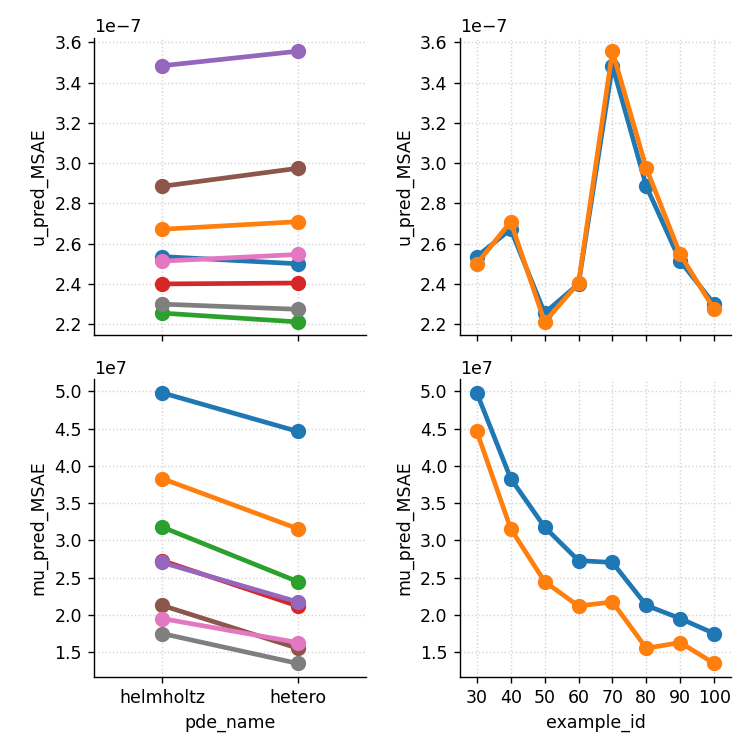

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.a

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.a

In [16]:
fig = ps.plot(
    metrics.reset_index(),
    x=param_cols,
    y=['u_pred_MSAE', 'mu_pred_MSAE'],
    height=3,
    width=3,
    legend=False,
    tight=True
)

Pretty much all models fit the wave field to a very low error.

In [ ]:
fig = ps.plot(
    metrics.reset_index(),
    x=param_cols,
    y=['PDE_MSAE'],
    height=3,
    width=2.5,
    legend=False,
    tight=True
)

There is much more variance in minimizing the PDE residual, and no clear trends jump out at first.

In [ ]:
fig = ps.plot(
    metrics.reset_index(),
    x=param_cols,
    y=['PDE_MSAE'],
    hue='pde_name',
    height=4, width=2.5,
    tight=True
)

Overall it seems that the Helmholtz PDE residual was easier to minimize than the heterogeneous PDE. There also appears to be a trend where the residuals are lower (for both PDEs) when omega0 is higher.

In [ ]:
fig = ps.plot(
    metrics.reset_index(),
    x=param_cols,
    y=['mu_pred_MAD'],
    height=8, width=3,
    tight=True
)

Here we are looking at the median absolute deviation of the predict stiffness in each of the regions. There is a very clear signal in the PDE name plot: Using the heterogeneous PDE results in lower error in the predicted stiffness per region, compared to the Helmholtz PDE. There may be a trend in the omeg0 and activ_fn plots as well, but it's less clear.

In [ ]:
fig = ps.plot(
    metrics.reset_index(),
    x=param_cols,
    y=['mu_pred_MAD'],
    hue='pde_name',
    height=4, width=3,
    tight=True
)
fig.savefig('1d_experiment_mu_pred_MAD.png', dpi=300, bbox_inches='tight')

This plot emphasizes a clear and statistically significant signal from using the heterogeneous PDE instead of the Helmholtz PDE, resulting in more accurate predicted stiffness.

In [ ]:
m = metrics.reset_index()
m['Mean % mu error (by region)'] = m['mu_pred_MAD'] / m['mu_true_MAV'] * 100

fig = ps.plot(
    m,
    x=param_cols,
    y=['Mean % mu error (by region)'],
    hue='pde_name',
    height=4, width=3,
    tight=True
)
fig.savefig('1d_experiment_mu_pred_MAD_relative.png', dpi=300, bbox_inches='tight')

In [ ]:
agg = metrics.reset_index().groupby(param_cols).mean()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = sns.lmplot(data=agg.reset_index(), x='PDE_MSAE', y='mu_pred_MAD', hue='pde_name')
fig.savefig('1d_experiment_mu_pred_MAD_corr.png', dpi=200, bbox_inches='tight')

Even though using the heterogeneous PDE instead of Helmholtz consistently improves reconstruction quality, there is not a clear correlation between the PDE residual and the reconstruction quality. If anything, the Helmholtz residual is more strongly correlated with mu error, even though mu error is higher in absolute terms.

In [ ]:
m = metrics.reset_index()

fig = ps.plot(
    m[m.pde_name == 'hetero'].copy(),
    x=param_cols[1:],
    y=['mu_pred_MAD'],
    height=5.5, width=3,
    tight=True
)

There does not seem to be a relationship with the PDE distribution. So even though I was correct that the Helmholtz PDE seems worse then heterogeneous, the reason why does not seem to be related to the domain sampling distribution.